In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
from matplotlib import pyplot as plt
import os
import datetime
import datetime as dt

In [2]:
df=pd.read_excel('forecast.xlsx')
df

,DLG_snapshot,DateKey,DayNumberOfMonth,monthnumberofyear,YearCalendar,MonthNameOfYear,departureDate,Region,POS,CountryCode,CommonOD,Cabin,CY_Passenger,LY_Passenger,CY_FlownPassenger,LY_FlownPassenger,CY_Revenue,LY_Revenue,CY_localRevenue,LY_localRevenue
0,2022-01-29,20200101,1,1,2020,January,2020-01-01,Malaysia & Brunei,KUL,MY,CMBKUL,Y,7.0,26.0,7.0,26.0,4191.28,11505.41,4191.279907,11505.410034
1,2022-01-29,20200101,1,1,2020,January,2020-01-01,Malaysia & Brunei,KUL,MY,KNOKUL,J,1.0,NaN,1.0,NaN,423.00,NaN,423.000000,NaN
2,2022-01-29,20200101,1,1,2020,January,2020-01-01,Malaysia & Brunei,KUL,MY,KUAMYY,Y,2.0,2.0,2.0,2.0,1722.00,210.20,1721.999969,210.199997
3,2022-01-29,20200101,1,1,2020,January,2020-01-01,Malaysia & Brunei,KUL,MY,KULBWN,Y,39.0,NaN,39.0,NaN,19377.15,NaN,16793.069981,NaN
4,2022-01-29,20200101,1,1,2020,January,2020-01-01,Malaysia & Brunei,KUL,MY,KULKBR,J,10.0,3.0,10.0,3.0,6467.99,2461.00,6467.989937,2461.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520397,2022-01-29,20200114,14,1,2020,January,2020-01-14,Malaysia & Brunei,KUL,MY,PENPVG,Y,NaN,7.0,NaN,7.0,NaN,4577.00,NaN,4577.000000
520398,2022-01-29,20200114,14,1,2020,January,2020-01-14,Malaysia & Brunei,KUL,MY,ADLKUL,Y,14.0,NaN,14.0,NaN,18687.37,NaN,18687.369751,NaN
520399,2022-01-29,20200114,14,1,2020,January,2020-01-14,Malaysia & Brunei,KUL,MY,LHRLGK,Y,1.0,NaN,1.0,NaN,1098.64,NaN,1098.640015,NaN
520400,2022-01-29,20200114,14,1,2020,January,2020-01-14,Malaysia & Brunei,KUL,MY,MNLKUL,Y,45.0,29.0,45.0,29.0,37266.86,17508.35,22707.679840,17508.350037


In [3]:
df1=df[["departureDate","POS","CommonOD","Cabin","CY_Passenger","CY_Revenue"]]
df1

,departureDate,POS,CommonOD,Cabin,CY_Passenger,CY_Revenue
0,2020-01-01,KUL,CMBKUL,Y,7.0,4191.28
1,2020-01-01,KUL,KNOKUL,J,1.0,423.00
2,2020-01-01,KUL,KUAMYY,Y,2.0,1722.00
3,2020-01-01,KUL,KULBWN,Y,39.0,19377.15
4,2020-01-01,KUL,KULKBR,J,10.0,6467.99
...,...,...,...,...,...,...
520397,2020-01-14,KUL,PENPVG,Y,NaN,NaN
520398,2020-01-14,KUL,ADLKUL,Y,14.0,18687.37
520399,2020-01-14,KUL,LHRLGK,Y,1.0,1098.64
520400,2020-01-14,KUL,MNLKUL,Y,45.0,37266.86


In [40]:
df1.describe()

,CY_Passenger,CY_Revenue,flown_pax,fare
count,125395.000000,1.253950e+05,125395.000000,1.242310e+05
mean,32.358316,1.603701e+04,32.358316,inf
std,89.030066,4.069482e+04,89.030066,NaN
min,0.000000,-9.145540e+03,0.000000,-3.048513e+03
25%,2.000000,9.283850e+02,2.000000,2.729900e+02
50%,5.000000,3.312140e+03,5.000000,5.168643e+02
75%,20.000000,1.344519e+04,20.000000,9.949096e+02
max,1850.000000,1.242038e+06,1850.000000,inf


In [4]:
df1.isnull().sum()

departureDate         0
POS                   0
CommonOD             51
Cabin                 0
CY_Passenger     394523
CY_Revenue       395004
dtype: int64

In [5]:
df1=df1.sort_values(by='departureDate', ascending=True)
df1

,departureDate,POS,CommonOD,Cabin,CY_Passenger,CY_Revenue
0,2020-01-01,KUL,CMBKUL,Y,7.0,4191.28
862,2020-01-01,KUL,ADLKUL,Y,NaN,NaN
863,2020-01-01,KUL,BKILHR,Y,3.0,10999.05
864,2020-01-01,KUL,DACPEN,Y,23.0,3992.50
865,2020-01-01,KUL,JHBHAN,Y,NaN,NaN
...,...,...,...,...,...,...
518994,2022-12-31,KUL,MYYKUL,Y,NaN,NaN
518995,2022-12-31,KUL,MYYSIN,Y,NaN,NaN
518996,2022-12-31,KUL,PENKTM,Y,NaN,NaN
518998,2022-12-31,KUL,SDKKCH,Y,NaN,NaN


In [6]:
df1.dropna(inplace=True)

In [7]:
df1.isnull().sum()

departureDate    0
POS              0
CommonOD         0
Cabin            0
CY_Passenger     0
CY_Revenue       0
dtype: int64

In [8]:
df1.shape

(125395, 6)

In [9]:
df1

,departureDate,POS,CommonOD,Cabin,CY_Passenger,CY_Revenue
0,2020-01-01,KUL,CMBKUL,Y,7.0,4191.28
863,2020-01-01,KUL,BKILHR,Y,3.0,10999.05
864,2020-01-01,KUL,DACPEN,Y,23.0,3992.50
866,2020-01-01,KUL,KBRKUA,Y,1.0,210.10
867,2020-01-01,KUL,MYYPEN,Y,1.0,54.49
...,...,...,...,...,...,...
465283,2022-08-25,KUL,KULBKK,J,34.0,38667.01
473824,2022-08-25,KUL,JHBLBU,Y,5.0,482.89
465284,2022-08-25,KUL,LBUKBR,Y,11.0,8621.46
465263,2022-08-25,KUL,KCHMEL,Y,5.0,10207.13


In [44]:
df1['CommonOD'].unique().shape

(1663,)

In [11]:
df1["flown_pax"]=df1["CY_Passenger"]
df1["fare"]=df1["CY_Revenue"]/df1["CY_Passenger"]
df1

,departureDate,POS,CommonOD,Cabin,CY_Passenger,CY_Revenue,flown_pax,fare
0,2020-01-01,KUL,CMBKUL,Y,7.0,4191.28,7.0,598.754286
863,2020-01-01,KUL,BKILHR,Y,3.0,10999.05,3.0,3666.350000
864,2020-01-01,KUL,DACPEN,Y,23.0,3992.50,23.0,173.586957
866,2020-01-01,KUL,KBRKUA,Y,1.0,210.10,1.0,210.100000
867,2020-01-01,KUL,MYYPEN,Y,1.0,54.49,1.0,54.490000
...,...,...,...,...,...,...,...,...
465283,2022-08-25,KUL,KULBKK,J,34.0,38667.01,34.0,1137.265000
473824,2022-08-25,KUL,JHBLBU,Y,5.0,482.89,5.0,96.578000
465284,2022-08-25,KUL,LBUKBR,Y,11.0,8621.46,11.0,783.769091
465263,2022-08-25,KUL,KCHMEL,Y,5.0,10207.13,5.0,2041.426000


In [12]:
df2=df1.copy()
df2

,departureDate,POS,CommonOD,Cabin,CY_Passenger,CY_Revenue,flown_pax,fare
0,2020-01-01,KUL,CMBKUL,Y,7.0,4191.28,7.0,598.754286
863,2020-01-01,KUL,BKILHR,Y,3.0,10999.05,3.0,3666.350000
864,2020-01-01,KUL,DACPEN,Y,23.0,3992.50,23.0,173.586957
866,2020-01-01,KUL,KBRKUA,Y,1.0,210.10,1.0,210.100000
867,2020-01-01,KUL,MYYPEN,Y,1.0,54.49,1.0,54.490000
...,...,...,...,...,...,...,...,...
465283,2022-08-25,KUL,KULBKK,J,34.0,38667.01,34.0,1137.265000
473824,2022-08-25,KUL,JHBLBU,Y,5.0,482.89,5.0,96.578000
465284,2022-08-25,KUL,LBUKBR,Y,11.0,8621.46,11.0,783.769091
465263,2022-08-25,KUL,KCHMEL,Y,5.0,10207.13,5.0,2041.426000


In [13]:
df2["departureDate"]=pd.to_datetime(df2["departureDate"])
df2["year"]=df2["departureDate"].dt.year
df2["flownmonth"]=df2["departureDate"].dt.month
df2

,departureDate,POS,CommonOD,Cabin,CY_Passenger,CY_Revenue,flown_pax,fare,year,flownmonth
0,2020-01-01,KUL,CMBKUL,Y,7.0,4191.28,7.0,598.754286,2020,1
863,2020-01-01,KUL,BKILHR,Y,3.0,10999.05,3.0,3666.350000,2020,1
864,2020-01-01,KUL,DACPEN,Y,23.0,3992.50,23.0,173.586957,2020,1
866,2020-01-01,KUL,KBRKUA,Y,1.0,210.10,1.0,210.100000,2020,1
867,2020-01-01,KUL,MYYPEN,Y,1.0,54.49,1.0,54.490000,2020,1
...,...,...,...,...,...,...,...,...,...,...
465283,2022-08-25,KUL,KULBKK,J,34.0,38667.01,34.0,1137.265000,2022,8
473824,2022-08-25,KUL,JHBLBU,Y,5.0,482.89,5.0,96.578000,2022,8
465284,2022-08-25,KUL,LBUKBR,Y,11.0,8621.46,11.0,783.769091,2022,8
465263,2022-08-25,KUL,KCHMEL,Y,5.0,10207.13,5.0,2041.426000,2022,8


In [14]:
df2.groupby(["year","flownmonth"]) ["flown_pax"].sum()
df2

,departureDate,POS,CommonOD,Cabin,CY_Passenger,CY_Revenue,flown_pax,fare,year,flownmonth
0,2020-01-01,KUL,CMBKUL,Y,7.0,4191.28,7.0,598.754286,2020,1
863,2020-01-01,KUL,BKILHR,Y,3.0,10999.05,3.0,3666.350000,2020,1
864,2020-01-01,KUL,DACPEN,Y,23.0,3992.50,23.0,173.586957,2020,1
866,2020-01-01,KUL,KBRKUA,Y,1.0,210.10,1.0,210.100000,2020,1
867,2020-01-01,KUL,MYYPEN,Y,1.0,54.49,1.0,54.490000,2020,1
...,...,...,...,...,...,...,...,...,...,...
465283,2022-08-25,KUL,KULBKK,J,34.0,38667.01,34.0,1137.265000,2022,8
473824,2022-08-25,KUL,JHBLBU,Y,5.0,482.89,5.0,96.578000,2022,8
465284,2022-08-25,KUL,LBUKBR,Y,11.0,8621.46,11.0,783.769091,2022,8
465263,2022-08-25,KUL,KCHMEL,Y,5.0,10207.13,5.0,2041.426000,2022,8


In [15]:
df3=df2.copy()

In [16]:
df4=df2[["departureDate","flown_pax"]]
print (df4.dtypes)
df4

departureDate    datetime64[ns]
flown_pax               float64
dtype: object


,departureDate,flown_pax
0,2020-01-01,7.0
863,2020-01-01,3.0
864,2020-01-01,23.0
866,2020-01-01,1.0
867,2020-01-01,1.0
...,...,...
465283,2022-08-25,34.0
473824,2022-08-25,5.0
465284,2022-08-25,11.0
465263,2022-08-25,5.0


In [17]:
df4=df4.groupby("departureDate").sum()

In [48]:
df4["departureDate"]=pd.to_datetime(df4["departureDate"])

C:\Users\Revemax\AppData\Local\Temp\ipykernel_14896\2764540287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["departureDate"]=pd.to_datetime(df4["departureDate"])


In [99]:
df4 = (df4.resample('M').sum())

In [100]:
print(len(df4))
size=int(len(df4)*0.75)
print(size)

32
24


In [21]:
df4['flown_pax'].head(15)

departureDate
2020-01-31    340380.0
2020-02-29    254877.0
2020-03-31    149700.0
2020-04-30      8037.0
2020-05-31      4769.0
2020-06-30      9522.0
2020-07-31     23497.0
2020-08-31     34978.0
2020-09-30     60870.0
2020-10-31     14292.0
2020-11-30     10018.0
2020-12-31     25397.0
2021-01-31     25831.0
2021-02-28     18201.0
2021-03-31     28888.0
Freq: M, Name: flown_pax, dtype: float64

In [22]:
df4['flown_pax'][:size].head(15)

departureDate
2020-01-31    340380.0
2020-02-29    254877.0
2020-03-31    149700.0
2020-04-30      8037.0
2020-05-31      4769.0
2020-06-30      9522.0
2020-07-31     23497.0
2020-08-31     34978.0
2020-09-30     60870.0
2020-10-31     14292.0
2020-11-30     10018.0
2020-12-31     25397.0
2021-01-31     25831.0
2021-02-28     18201.0
2021-03-31     28888.0
Freq: M, Name: flown_pax, dtype: float64

In [53]:
df_train = df4['flown_pax'].iloc[:size]
df_test = df4['flown_pax'].iloc[size:]

In [118]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
size=int(len(df4)*0.75)
size1=int(len(df4))
model= HWES(df_train, seasonal_periods=12, trend='add', seasonal='add')
fitted = model.fit(optimized=True, use_brute=True)


C:\Users\suhai\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [84]:
print(fitted.summary())

                        ExponentialSmoothing Model Results                       
Dep. Variable:                     fare   No. Observations:                    24
Model:             ExponentialSmoothing   SSE                 128539253411972.094
Optimized:                         True   AIC                             735.421
Trend:                         Additive   BIC                             754.270
Seasonal:                Multiplicative   AICC                            872.221
Seasonal Periods:                    12   Date:                  Mon, 29 Aug 2022
Box-Cox:                          False   Time:                          13:23:17
Box-Cox Coeff.:                    None                                          
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9950000                alpha                 True
smoothing_trend 

In [119]:
pred_forecast = fitted.forecast(steps=12)

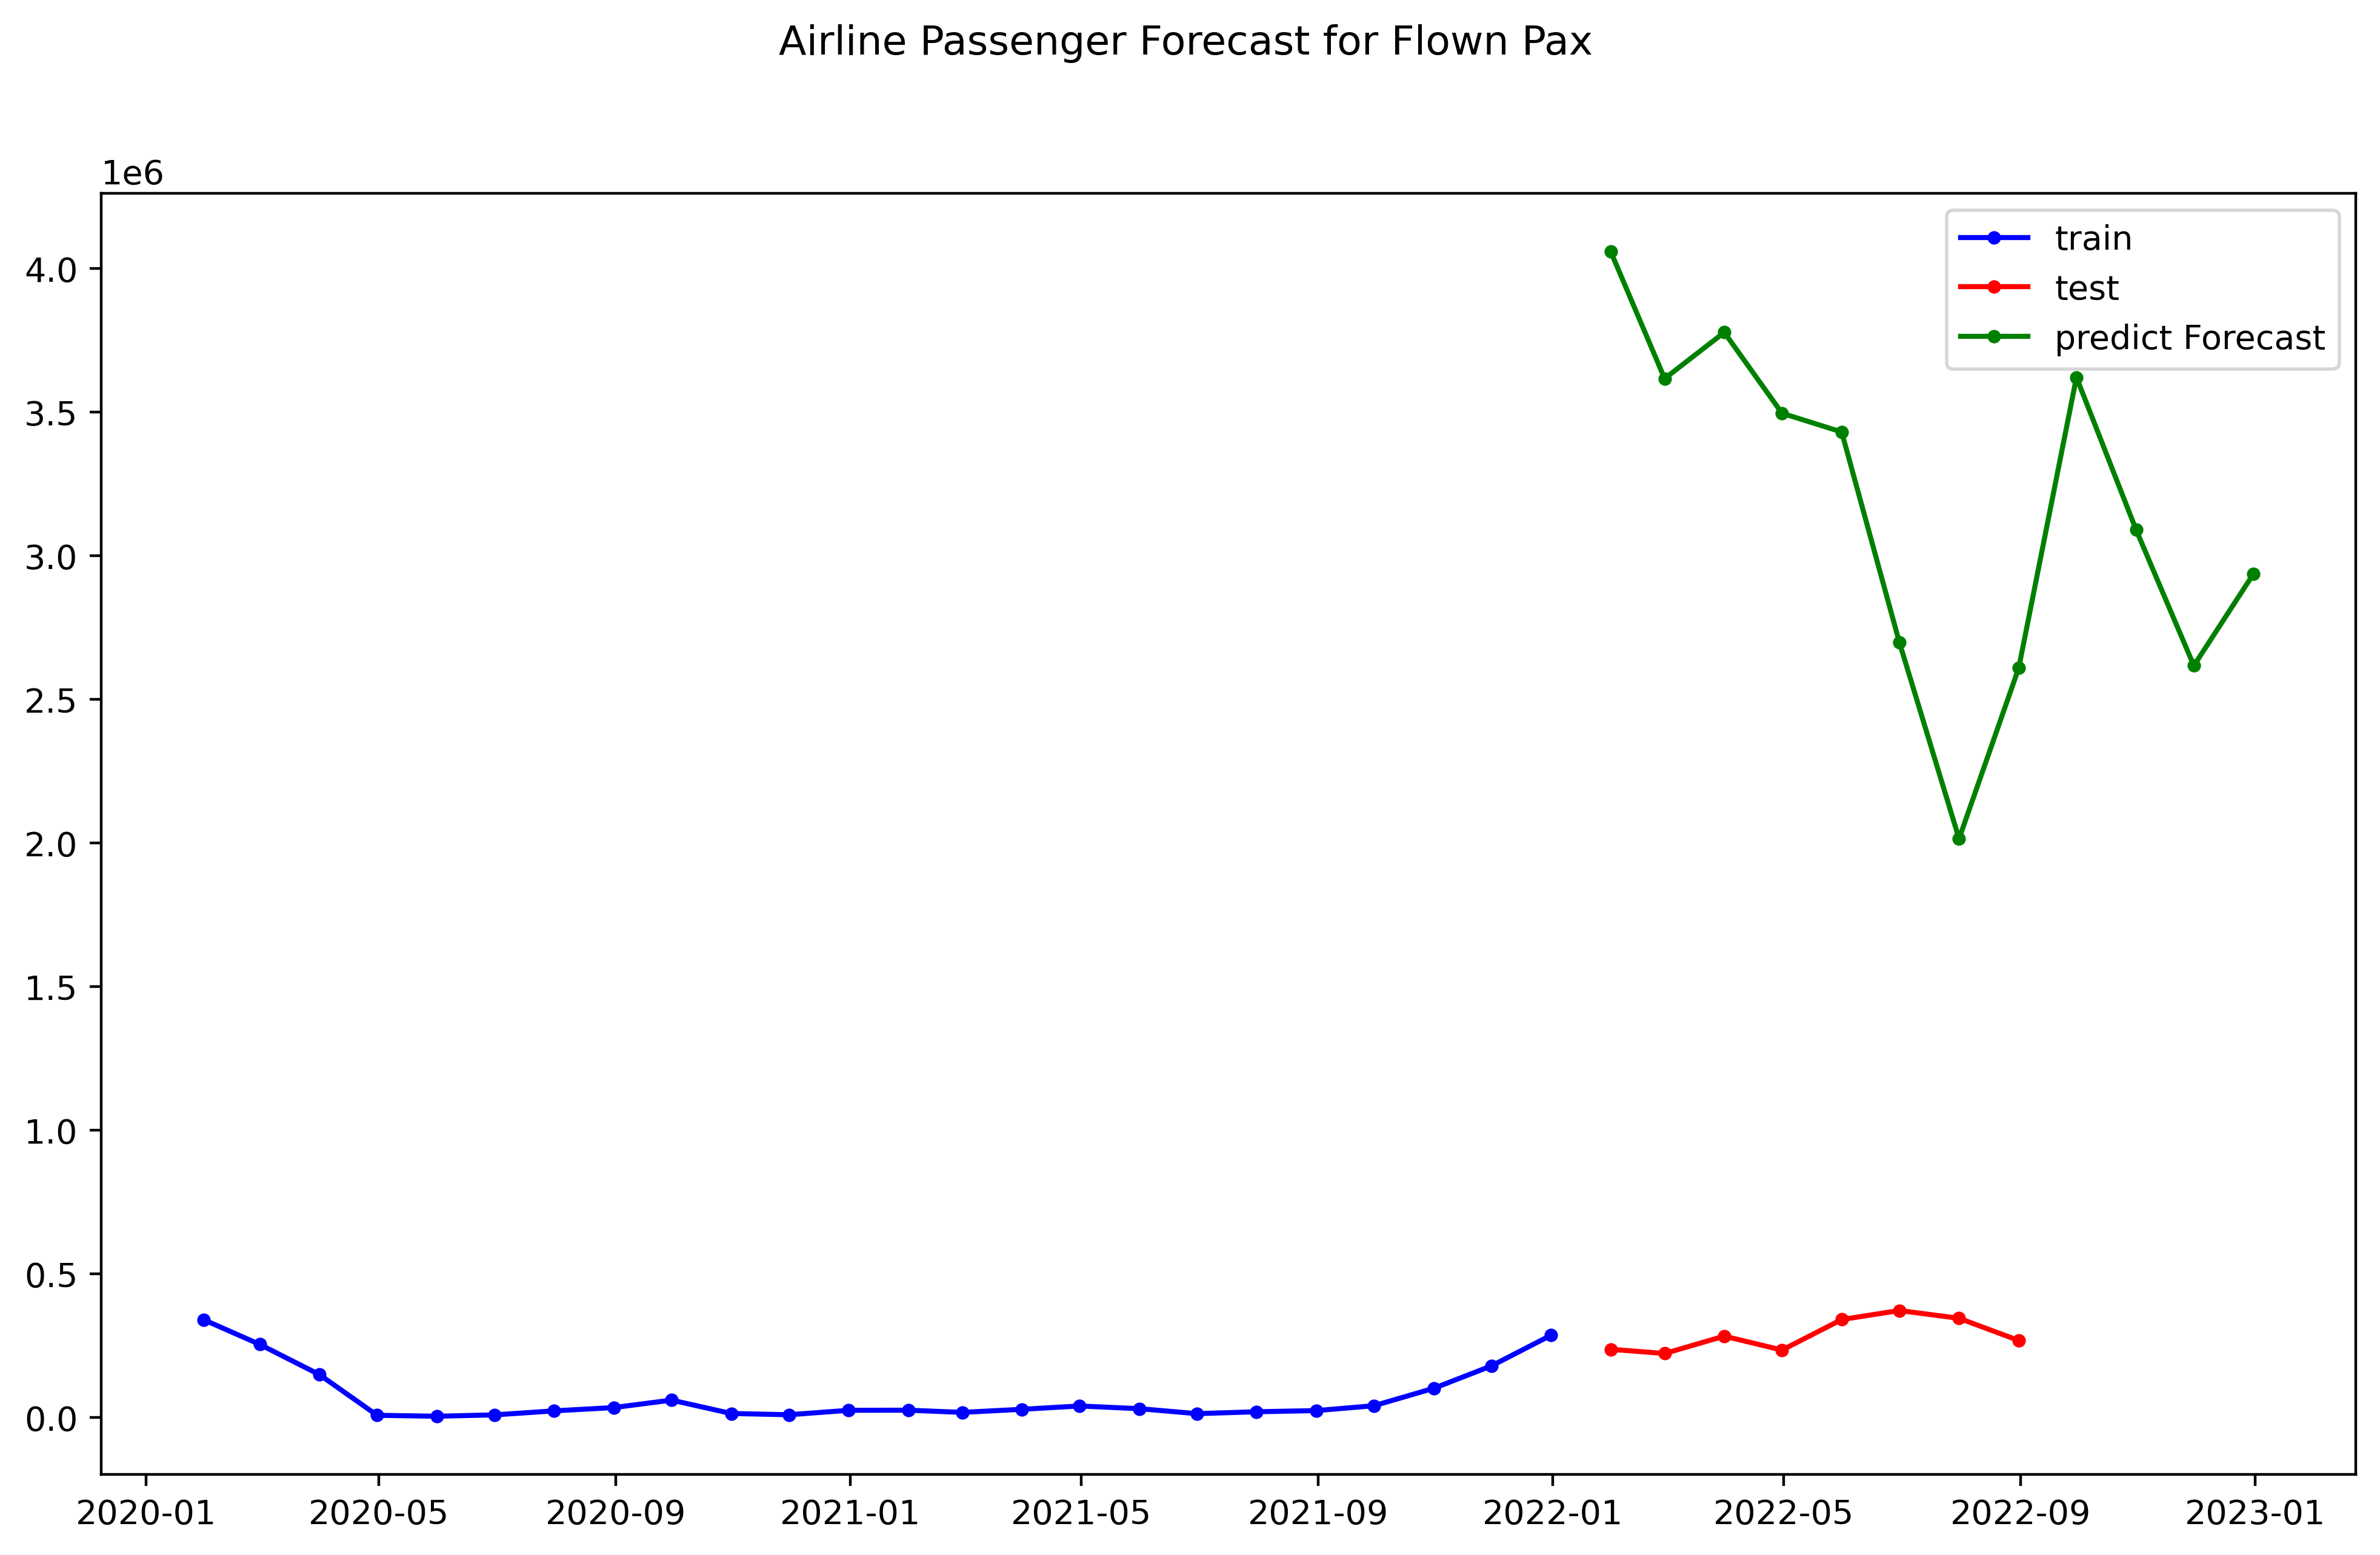

In [120]:
fig = plt.figure(figsize=(12, 7), dpi=400)
fig.suptitle('Airline Passenger Forecast for Flown Pax ')
past, = plt.plot(df4['flown_pax'][:size],'b.-', label='train')
future, = plt.plot(df4['flown_pax'][size:], 'r.-', label='test')
predicted_future, = plt.plot(pred_forecast,  'g.-', label='predict Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

In [121]:
pred_forecast

2022-01-31    4.059128e+06
2022-02-28    3.617177e+06
2022-03-31    3.777960e+06
2022-04-30    3.496478e+06
2022-05-31    3.431202e+06
2022-06-30    2.698565e+06
2022-07-31    2.015274e+06
2022-08-31    2.609519e+06
2022-09-30    3.621461e+06
2022-10-31    3.090518e+06
2022-11-30    2.617667e+06
2022-12-31    2.937557e+06
Freq: M, dtype: float64

In [122]:
df4.flown_pax[size:],pred_forecast[:size1-size]

(departureDate
 2022-01-31    237755.0
 2022-02-28    223212.0
 2022-03-31    283634.0
 2022-04-30    235091.0
 2022-05-31    341342.0
 2022-06-30    372837.0
 2022-07-31    345699.0
 2022-08-31    268491.0
 Freq: M, Name: flown_pax, dtype: float64,
 2022-01-31    4.059128e+06
 2022-02-28    3.617177e+06
 2022-03-31    3.777960e+06
 2022-04-30    3.496478e+06
 2022-05-31    3.431202e+06
 2022-06-30    2.698565e+06
 2022-07-31    2.015274e+06
 2022-08-31    2.609519e+06
 Freq: M, dtype: float64)

In [108]:
df5=df2[["departureDate","fare"]]
print (df5.dtypes)
df5

departureDate    datetime64[ns]
fare                    float64
dtype: object


,departureDate,fare
0,2020-01-01,598.754286
863,2020-01-01,3666.350000
864,2020-01-01,173.586957
866,2020-01-01,210.100000
867,2020-01-01,54.490000
...,...,...
465283,2022-08-25,1137.265000
473824,2022-08-25,96.578000
465284,2022-08-25,783.769091
465263,2022-08-25,2041.426000


In [109]:
df5=df5.groupby("departureDate").sum()

In [110]:
df5 = (df5.resample('M').sum())

In [111]:
print(len(df5))
size=int(len(df5)*0.75)
print(size)

32
24


In [112]:
df5['fare'][size:]
df_train1 = df5['fare'].iloc[:size]
df_test1 = df5['fare'].iloc[size:]

In [113]:
size=int(len(df5)*0.75)
size1=int(len(df5))
model1= HWES(df_train1, seasonal_periods=12, trend='add', seasonal='mul')
fitted1 = model1.fit(optimized=True, use_brute=True)

C:\Users\suhai\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [78]:
print(fitted1.summary())

                        ExponentialSmoothing Model Results                       
Dep. Variable:                     fare   No. Observations:                    24
Model:             ExponentialSmoothing   SSE                 128539253411972.094
Optimized:                         True   AIC                             735.421
Trend:                         Additive   BIC                             754.270
Seasonal:                Multiplicative   AICC                            872.221
Seasonal Periods:                    12   Date:                  Mon, 29 Aug 2022
Box-Cox:                          False   Time:                          13:19:48
Box-Cox Coeff.:                    None                                          
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9950000                alpha                 True
smoothing_trend 

In [114]:
pred_forecast1 = fitted1.forecast(steps=12)

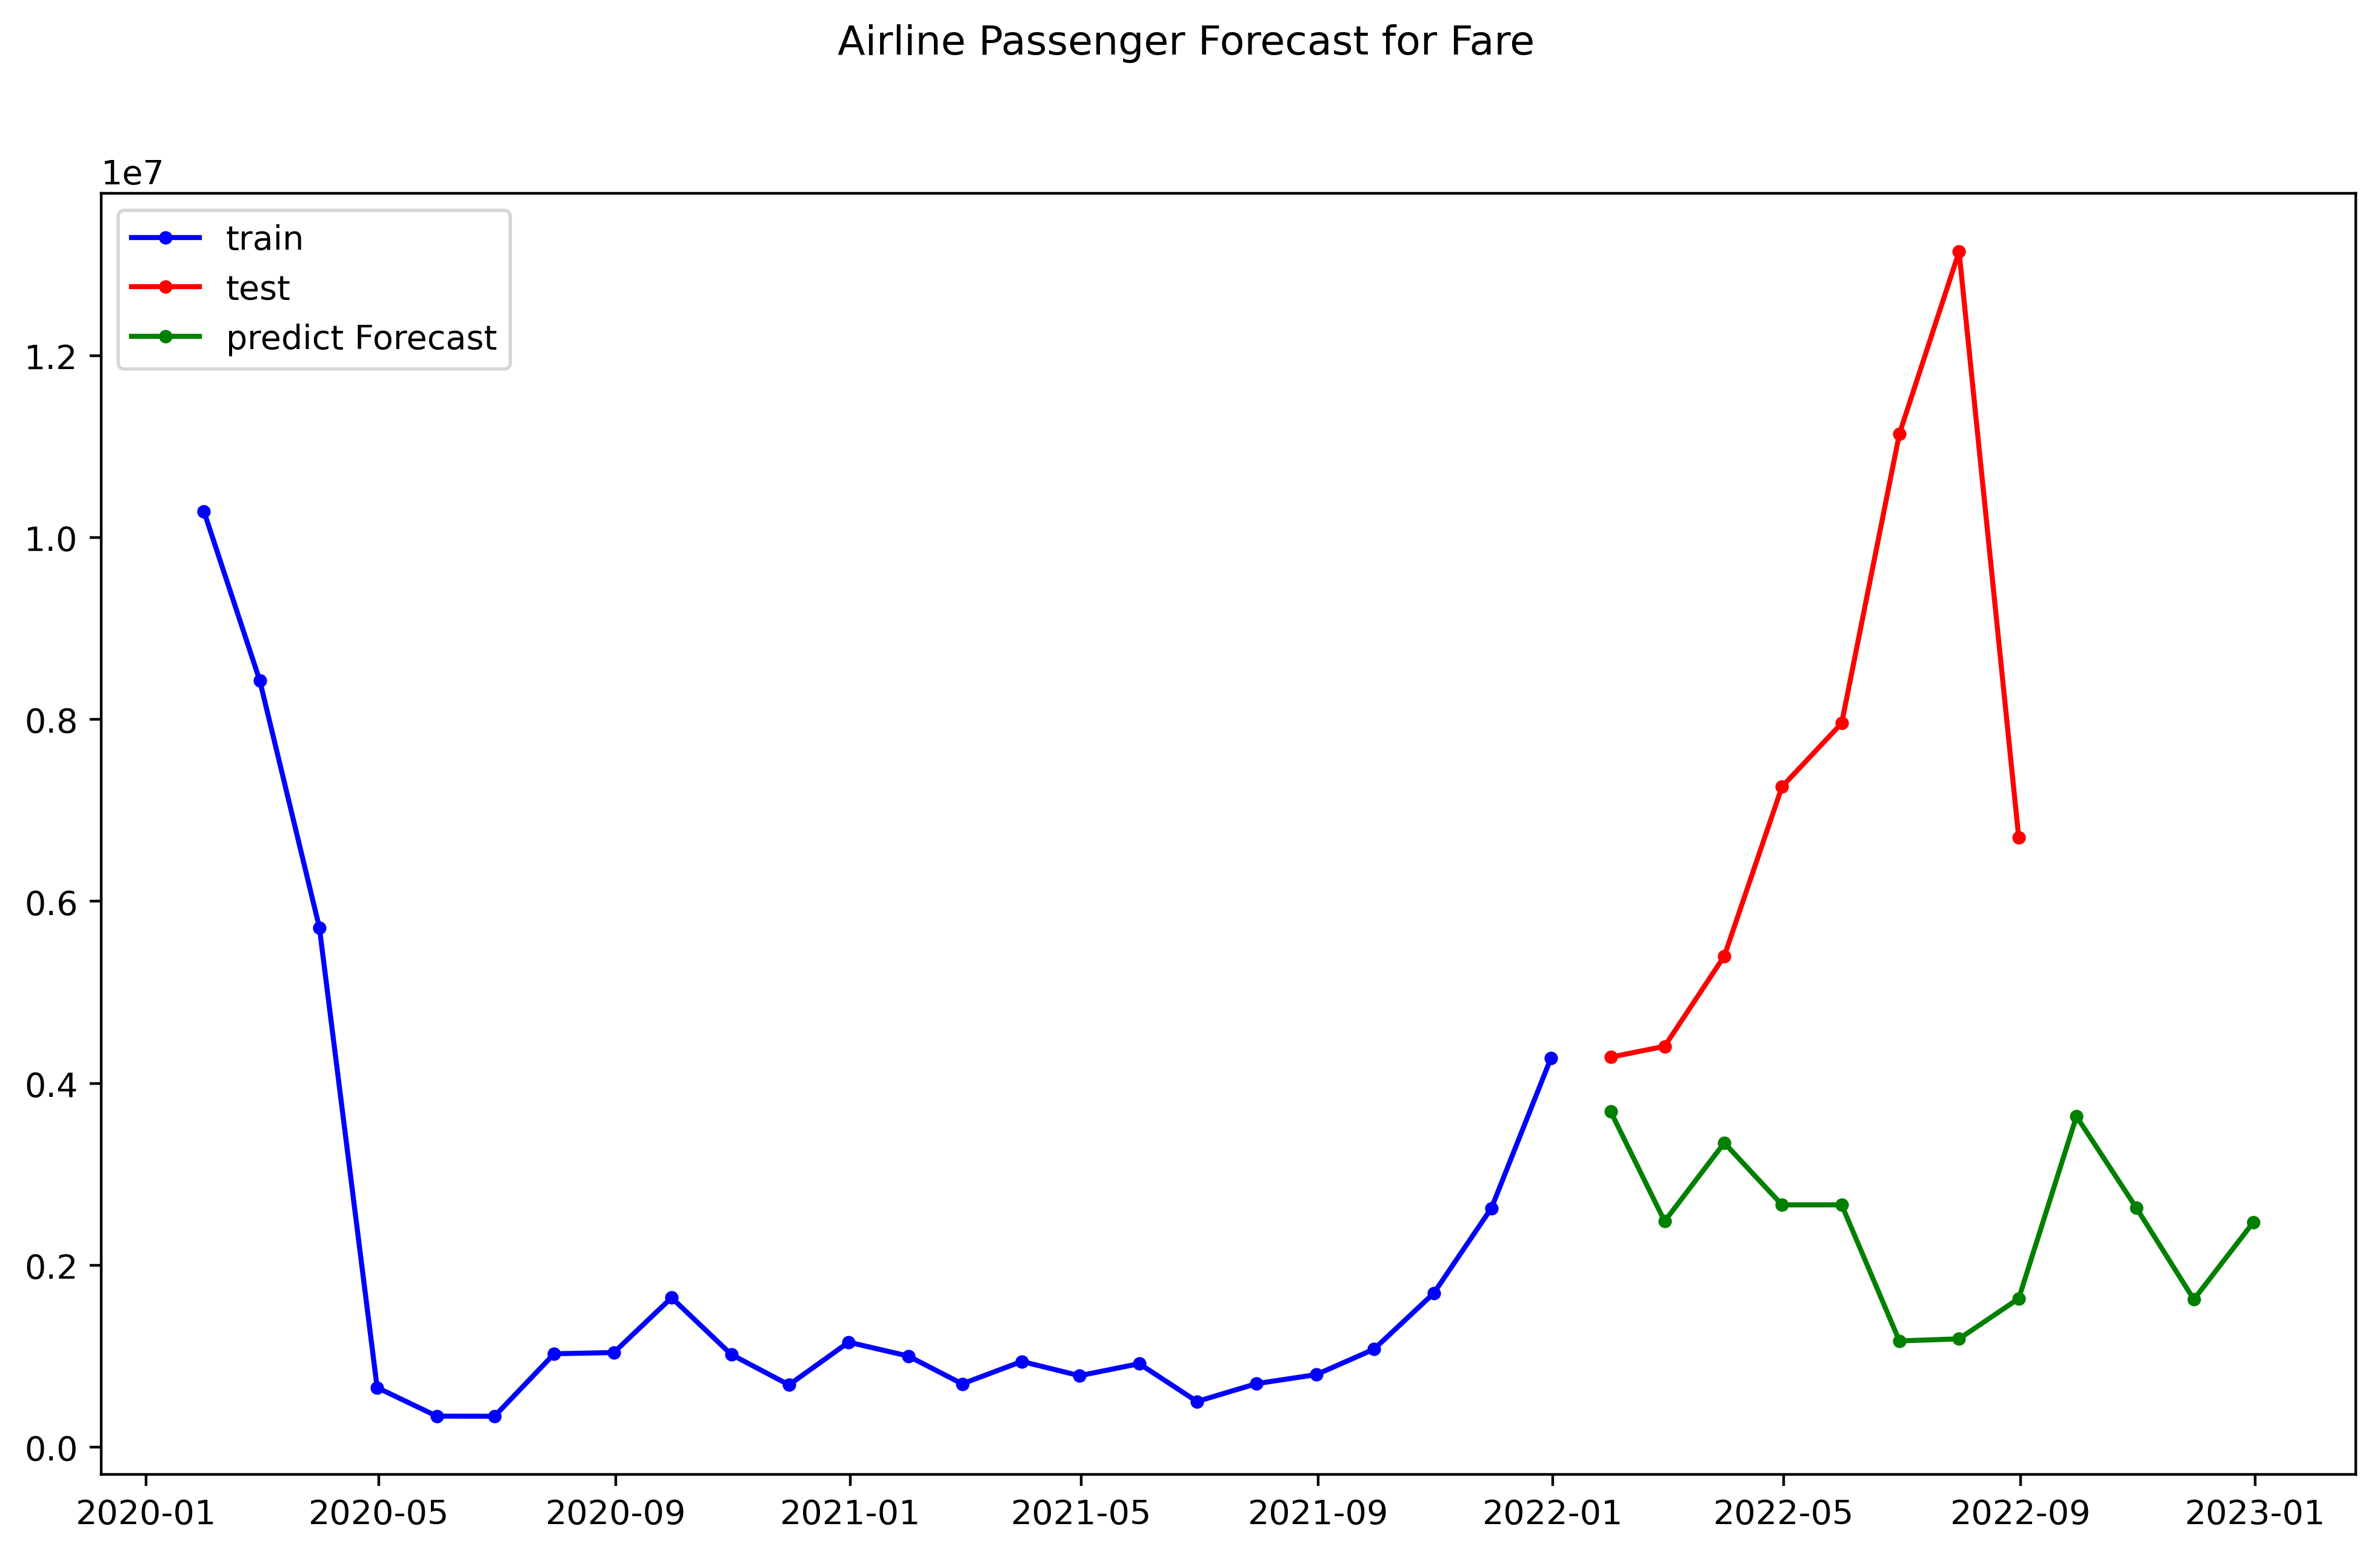

In [115]:
fig = plt.figure(figsize=(12, 7), dpi=400)
fig.suptitle('Airline Passenger Forecast for Fare ')
past, = plt.plot(df_train1,'b.-', label='train')
future, = plt.plot(df_test1, 'r.-', label='test')
predicted_future, = plt.plot(pred_forecast1,  'g.-', label='predict Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

In [116]:
pred_forecast1

2022-01-31    3.688616e+06
2022-02-28    2.484613e+06
2022-03-31    3.345842e+06
2022-04-30    2.664519e+06
2022-05-31    2.664776e+06
2022-06-30    1.168957e+06
2022-07-31    1.192111e+06
2022-08-31    1.635548e+06
2022-09-30    3.637457e+06
2022-10-31    2.635757e+06
2022-11-30    1.625232e+06
2022-12-31    2.475724e+06
Freq: M, dtype: float64

In [117]:
df5['fare'][size:],pred_forecast1[:size1-size]

(departureDate
 2022-01-31    4.288352e+06
 2022-02-28    4.407423e+06
 2022-03-31    5.398503e+06
 2022-04-30    7.260720e+06
 2022-05-31    7.957927e+06
 2022-06-30    1.113929e+07
 2022-07-31    1.314145e+07
 2022-08-31    6.701283e+06
 Freq: M, Name: fare, dtype: float64,
 2022-01-31    3.688616e+06
 2022-02-28    2.484613e+06
 2022-03-31    3.345842e+06
 2022-04-30    2.664519e+06
 2022-05-31    2.664776e+06
 2022-06-30    1.168957e+06
 2022-07-31    1.192111e+06
 2022-08-31    1.635548e+06
 Freq: M, dtype: float64)